In [1]:

    refs =\
[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view

In [2]:
    import ibis
    
<!-- END_TEASER -->

    import ibis
    
<!-- END_TEASER -->

In [3]:
  
    if 'repo' not in locals():
        repo = __import__('requests').get('https://api.github.com/repos/ibis-project/ibis').json()
    image = lambda *x: HTML("""<div class="imageflex" style="display:flex;">%s</div>"""%''.join(F'''<img src="data:image/png;base64,{base64.b64encode(x._repr_png_()).decode()}"/>''' for x in x))
    raw = lambda *x: HTML("""<div style="display:flex;">%s</div>"""%''.join(F'''<img src="data:image/png;base64,{base64.b64encode(x).decode()}"/>''' for x in x))
    %matplotlib agg
    import graphviz, pytest, ibis
    
<style>
.imageflex:hover img {transform: scale(.8); max-height: 80%;}
.imageflex img {transform: scale(.3); max-height: 400px;}
</style>

In [4]:
![]({{repo['owner']['avatar_url']}})

![](https://avatars3.githubusercontent.com/u/27442526?v=4)

In [5]:
    import ibis, pandas, dask, pytest, base64

    import ibis, pandas, dask, pytest, base64

In [6]:
[`ibis`][ibis] is a mature open source project that has been in development for __~{{((pandas.to_datetime('now').tz_localize('utc')-pandas.to_datetime(repo['created_at'])).days/365).__round__()}}__
years with __{{repo['stargazers_count']}}__ ⭐️ on Github.
It provides an interface to SQL for [Python] programmers and 
bridges the gap between remote storage & execution systems.
These features provide authors the ability to:

1. Write backend independent [SQL] expressions in [Python]
2. Access different database connections (eg. [sqlite], [omnisci], [pandas])
3. Visually confirm their SQL queries with [directed acyclic graphs (DAG)][dag]


[`ibis`][ibis] is an alternative approach using databases that relies on [Python] rather than [SQL] experience.
Typically, people would have to learn an entirely new syntax,
or [flavor of SQL], to perform simple tasks.
Now, those with Python abilities can avoid a new learning curve
by using [`ibis`][ibis] for composing and executing expressions in [SQL].
Using familiar [Python] syntaxes similar to [`pandas`][pandas] and [`dask`][dask]. 
[`ibis`][ibis] assists in formation of [SQL] expressions by providing visual feedback about each [Python] object.

This blog focuses on writing [SQL] expressions in [Python] and how to compose queries visually using [`ibis`][ibis].
We'll demonstrate this by using [SQLite] and [Sean Lahman’s baseball database][data].

{{refs}}

[`ibis`][ibis] is a mature open source project that has been in development for __~5__
years with __1349__ ⭐️ on Github.
It provides an interface to SQL for [Python] programmers and 
bridges the gap between remote storage & execution systems.
These features provide authors the ability to:

1. Write backend independent [SQL] expressions in [Python]
2. Access different database connections (eg. [sqlite], [omnisci], [pandas])
3. Visually confirm their SQL queries with [directed acyclic graphs (DAG)][dag]


[`ibis`][ibis] is an alternative approach using databases that relies on [Python] rather than [SQL] experience.
Typically, people would have to learn an entirely new syntax,
or [flavor of SQL], to perform simple tasks.
Now, those with Python abilities can avoid a new learning curve
by using [`ibis`][ibis] for composing and executing expressions in [SQL].
Using familiar [Python] syntaxes similar to [`pandas`][pandas] and [`dask`][dask]. 
[`ibis`][ibis] assists in formation of [SQL] expressions by providing visual feedback about each [Python] object.

This blog focuses on writing [SQL] expressions in [Python] and how to compose queries visually using [`ibis`][ibis].
We'll demonstrate this by using [SQLite] and [Sean Lahman’s baseball database][data].

[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view

In [7]:
## Connecting to a database.

To get started, we’ll need to establish a [database connection]. [`ibis`][ibis] makes it easy to create different connections.
Let's go ahead and do this now.

    client = ibis.sqlite.connect('lahmansbaseballdb.sqlite')
    
<br/>
    
The `client` variable above represents our connection to the database.
The [baseball database][data] we are using has __{{client.list_tables().__len__()}}__ tables, 
which we can see by running the following code:

    >>> client.list_tables()
    [...'appearances'...'halloffame', 'homegames', 'leagues', 'managers',...]

---

>> It is essential to use the correct [`ibis`][ibis] `client` for the file types being used.

---

{{refs}}

## Connecting to a database.

To get started, we’ll need to establish a [database connection]. [`ibis`][ibis] makes it easy to create different connections.
Let's go ahead and do this now.

    client = ibis.sqlite.connect('lahmansbaseballdb.sqlite')
    
<br/>
    
The `client` variable above represents our connection to the database.
The [baseball database][data] we are using has __29__ tables, 
which we can see by running the following code:

    >>> client.list_tables()
    [...'appearances'...'halloffame', 'homegames', 'leagues', 'managers',...]

---

>> It is essential to use the correct [`ibis`][ibis] `client` for the file types being used.

---

[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view


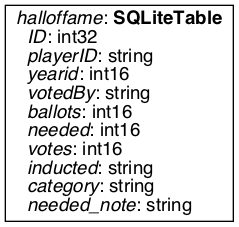
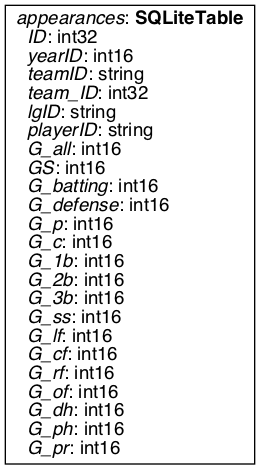

,ID,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,1,cobbty01,1936,BBWAA,226,170,222,Y,Player,None
1,2,ruthba01,1936,BBWAA,226,170,215,Y,Player,None
2,3,wagneho01,1936,BBWAA,226,170,215,Y,Player,None
3,4,mathech01,1936,BBWAA,226,170,205,Y,Player,None
4,5,johnswa01,1936,BBWAA,226,170,189,Y,Player,None


## Selecting and visualizing tables.

Now that we have a connection we can create a data frame from [ibis] expressions similar to the example above.
To demonstrate some of [`ibis`][ibis] capabilities,
we’ll examine information in the `halloffame` and `appearances` tables of the database.
Let's create those tables now.

    halloffame, appearances = client.table('halloffame'), client.table('appearances')

<br/>
A useful feature of [ibis] is its ability to representat of our [SQL] query in a [DAG] using [`graphviz`][graphviz].
[`dask`][dask] users will be familiar with this helpful feature.

<!--

    return image(halloffame, appearances)
    
-->


At the moment, our table doesn’t hold any data;
instead, they are expressions represent operations applied to the data where its located - in the SQLite database.
We can prove this by asserting its instance like this:
    
    >>> assert isinstance(halloffame, ibis.expr.types.TableExpr)

    sample = halloffame.head()
    
Looking at the `sample` expression we can reveal the SQL query we constructed.
    
    >>> str(sample.compile())
    'SELECT t0."ID", t0."playerID",...FROM base.halloffame AS t0...LIMIT ? OFFSET ?'
    
And we can now execute the expression to return a [tidy `pandas.DataFrame`][tidy data].
    
    >>> assert isinstance(sample.execute(), pandas.DataFrame)
    
[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view    

    sample.execute()
    

In [8]:
## Selecting and visualizing tables.

Now that we have a connection we can create a data frame from [ibis] expressions similar to the example above.
To demonstrate some of [`ibis`][ibis] capabilities,
we’ll examine information in the `halloffame` and `appearances` tables of the database.
Let's create those tables now.

    halloffame, appearances = client.table('halloffame'), client.table('appearances')

<br/>
A useful feature of [ibis] is its ability to representat of our [SQL] query in a [DAG] using [`graphviz`][graphviz].
[`dask`][dask] users will be familiar with this helpful feature.

<!--

    return image(halloffame, appearances)
    
-->


At the moment, our table doesn’t hold any data;
instead, they are expressions represent operations applied to the data where its located - in the SQLite database.
We can prove this by asserting its instance like this:
    
    >>> assert isinstance(halloffame, ibis.expr.types.TableExpr)

    sample = halloffame.head()
    
Looking at the `sample` expression we can reveal the SQL query we constructed.
    
    >>> str(sample.compile())
    'SELECT t0."ID", t0."playerID",...FROM base.halloffame AS t0...LIMIT ? OFFSET ?'
    
And we can now execute the expression to return a [tidy `pandas.DataFrame`][tidy data].
    
    >>> assert isinstance(sample.execute(), pandas.DataFrame)
    
{{refs}}    

    sample.execute()
    


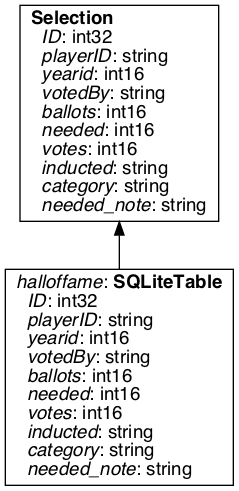

## Filtering and selecting data.

As mentioned earlier, [ibis] uses familiar [pandas] syntax to build [SQL] queries.
Tho show how to filter and select data we will `filter` the `players` from our `halloffame` table by applying
our boolean logic to the `halloffame` expression.
    
    condition = halloffame.category == 'Player'
    players = halloffame[condition]
    
<!--

    return image(players)

-->

[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view

In [9]:
## Filtering and selecting data.

As mentioned earlier, [ibis] uses familiar [pandas] syntax to build [SQL] queries.
Tho show how to filter and select data we will `filter` the `players` from our `halloffame` table by applying
our boolean logic to the `halloffame` expression.
    
    condition = halloffame.category == 'Player'
    players = halloffame[condition]
    
<!--

    return image(players)

-->

{{refs}}


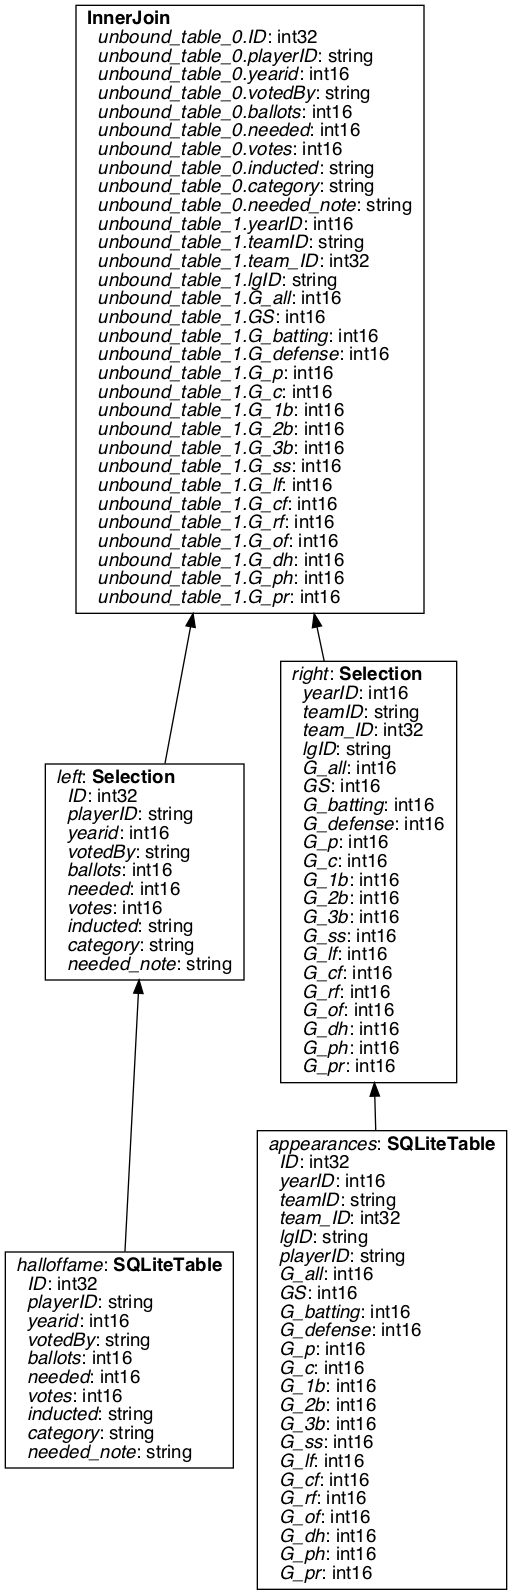
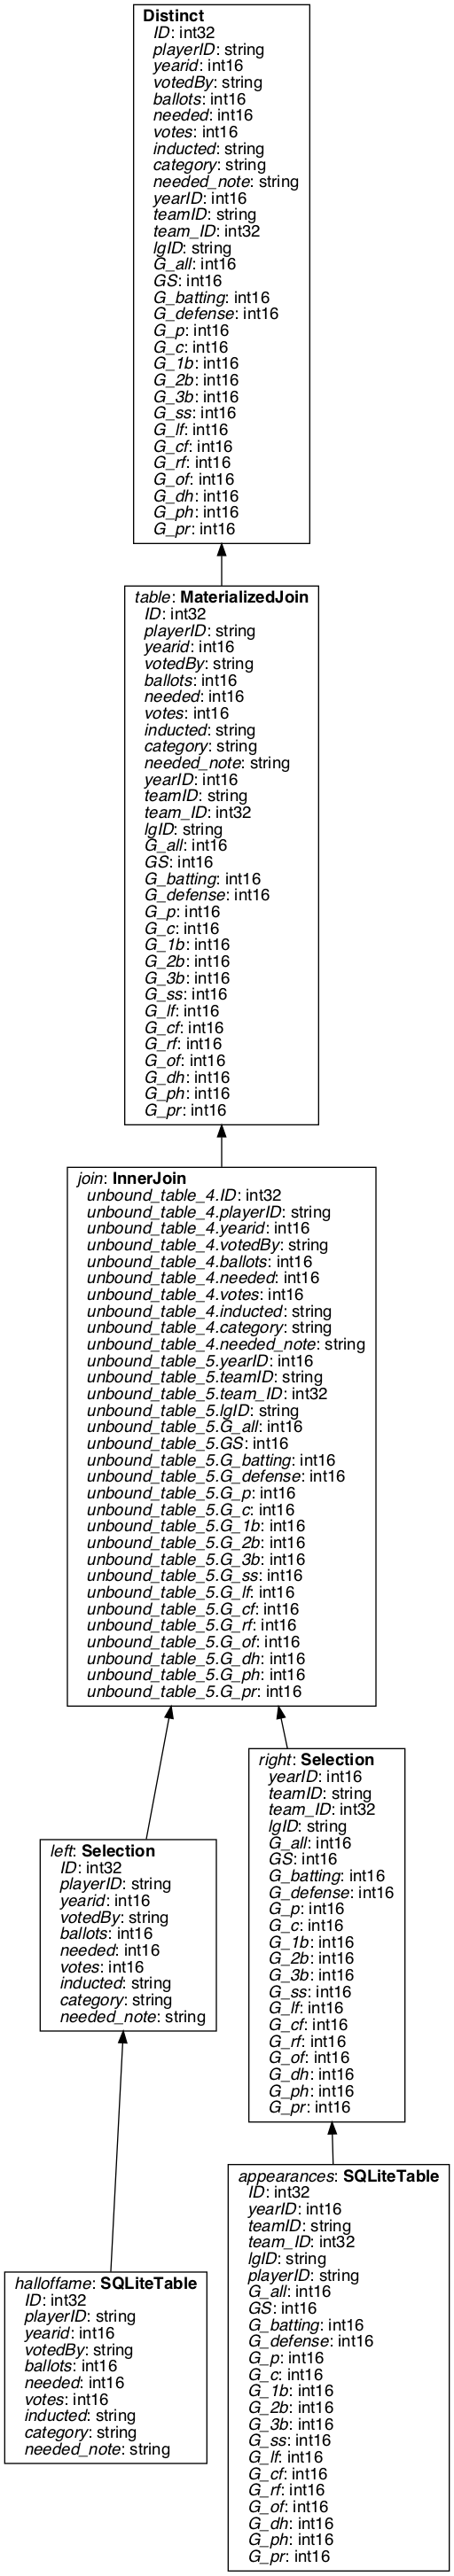

## Joining [`ibis`][ibis] tables.

If we want a single view of the `halloffame` players and their `appearances`,
we need to join the two tables. 
To do this, we’ll perform an inner join based on the __playerID__
column in our new `players` table.

    condition = players.playerID == appearances.playerID
    
The `players` and `appearances` tables share columns, but SQL doesn't handle overlapping columns very well.
Specifically in our data `('playerID' and 'ID')` are in both tables, we will filter the 
columns from the `appearances` table, because they appear in the `players` table.
Then we will compose the join. We do this by using a Python list comprehension.
    
    columns = [x for x in appearances.columns if x not in ('playerID', 'ID')]
    
Now to compose the join.
    
    unmaterialized = players.join(appearances[columns], condition)
    
    
#### [Materializing][materialized view] the `join`
---

Joins, in databases, require a [materialized view] to proceed with building expressions.
Just remember to use the expressions __materialize__ method otherwise
`ibis` will throw an error; demonstrated by the test below.

    >>> with pytest.raises(ibis.IbisError): unmaterialized.distinct()

---

    join = unmaterialized.materialize().distinct()  # like 🐼.DataFrame.drop_duplicates

The code above completes the `join`, and a sample of our joined data is shared in the table below. 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>ID</th>
      <th>playerID</th>
      <th>yearid</th>
      <th>votedBy</th>
      <th>ballots</th>
      <th>needed</th>
      <th>votes</th>
      <th>inducted</th>
      <th>category</th>
      <th>needed_note</th>
      <th>yearID</th>
      <th>teamID</th>
      <th>team_ID</th>
      <th>lgID</th>
      <th>G_all</th>
      <th>GS</th>
      <th>G_batting</th>
      <th>G_defense</th>
      <th>G_p</th>
      <th>G_c</th>
      <th>G_1b</th>
      <th>G_2b</th>
      <th>G_3b</th>
      <th>G_ss</th>
      <th>G_lf</th>
      <th>G_cf</th>
      <th>G_rf</th>
      <th>G_of</th>
      <th>G_dh</th>
      <th>G_ph</th>
      <th>G_pr</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2861</td>
      <td>aaronha01</td>
      <td>1982</td>
      <td>BBWAA</td>
      <td>415</td>
      <td>312</td>
      <td>406</td>
      <td>Y</td>
      <td>Player</td>
      <td>None</td>
      <td>1871</td>
      <td>BS1</td>
      <td>1</td>
      <td>NA</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>16</td>
      <td>0</td>
      <td>15</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3744</td>
      <td>abbotji01</td>
      <td>2005</td>
      <td>BBWAA</td>
      <td>516</td>
      <td>387</td>
      <td>13</td>
      <td>N</td>
      <td>Player</td>
      <td>None</td>
      <td>1871</td>
      <td>BS1</td>
      <td>1</td>
      <td>NA</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>16</td>
      <td>0</td>
      <td>15</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>147</td>
      <td>adamsba01</td>
      <td>1937</td>
      <td>BBWAA</td>
      <td>201</td>
      <td>151</td>
      <td>8</td>
      <td>N</td>
      <td>Player</td>
      <td>None</td>
      <td>1871</td>
      <td>BS1</td>
      <td>1</td>
      <td>NA</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>16</td>
      <td>0</td>
      <td>15</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>260</td>
      <td>adamsba01</td>
      <td>1938</td>
      <td>BBWAA</td>
      <td>262</td>
      <td>197</td>
      <td>11</td>
      <td>N</td>
      <td>Player</td>
      <td>None</td>
      <td>1871</td>
      <td>BS1</td>
      <td>1</td>
      <td>NA</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>16</td>
      <td>0</td>
      <td>15</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>385</td>
      <td>adamsba01</td>
      <td>1939</td>
      <td>BBWAA</td>
      <td>274</td>
      <td>206</td>
      <td>11</td>
      <td>N</td>
      <td>Player</td>
      <td>None</td>
      <td>1871</td>
      <td>BS1</td>
      <td>1</td>
      <td>NA</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>31</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>16</td>
      <td>0</td>
      <td>15</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>


<!--

    return image(unmaterialized, join)

-->

[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view

In [10]:
## Joining [`ibis`][ibis] tables.

If we want a single view of the `halloffame` players and their `appearances`,
we need to join the two tables. 
To do this, we’ll perform an inner join based on the __playerID__
column in our new `players` table.

    condition = players.playerID == appearances.playerID
    
The `players` and `appearances` tables share columns, but SQL doesn't handle overlapping columns very well.
Specifically in our data `('playerID' and 'ID')` are in both tables, we will filter the 
columns from the `appearances` table, because they appear in the `players` table.
Then we will compose the join. We do this by using a Python list comprehension.
    
    columns = [x for x in appearances.columns if x not in ('playerID', 'ID')]
    
Now to compose the join.
    
    unmaterialized = players.join(appearances[columns], condition)
    
    
#### [Materializing][materialized view] the `join`
---

Joins, in databases, require a [materialized view] to proceed with building expressions.
Just remember to use the expressions __materialize__ method otherwise
`ibis` will throw an error; demonstrated by the test below.

    >>> with pytest.raises(ibis.IbisError): unmaterialized.distinct()

---

    join = unmaterialized.materialize().distinct()  # like 🐼.DataFrame.drop_duplicates

The code above completes the `join`, and a sample of our joined data is shared in the table below. 

{{join.head().execute().to_html()}}


<!--

    return image(unmaterialized, join)

-->

{{refs}}

In [11]:
<hr/>

[`ibis`][ibis] supports other join strategies as well. Those are listed below:

    >>> [x for x in dir(players) if 'join' in x]
    ['anti_join', 'any_inner_join', 'any_left_join', 'asof_join', 'cross_join', 'inner_join', 'join', 'left_join', 'outer_join', 'semi_join']

<hr/>

{{refs}}

<hr/>

[`ibis`][ibis] supports other join strategies as well. Those are listed below:

    >>> [x for x in dir(players) if 'join' in x]
    ['anti_join', 'any_inner_join', 'any_left_join', 'asof_join', 'cross_join', 'inner_join', 'join', 'left_join', 'outer_join', 'semi_join']

<hr/>

[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view

In [12]:
## Executing an expression

In this section, we'll expand the join in a `pandas.DataFrame`. We'll answer the question:
    
> __How many pitchers have been inducted into the hall of fame?__

## Executing an expression

In this section, we'll expand the join in a `pandas.DataFrame`. We'll answer the question:
    
> __How many pitchers have been inducted into the hall of fame?__


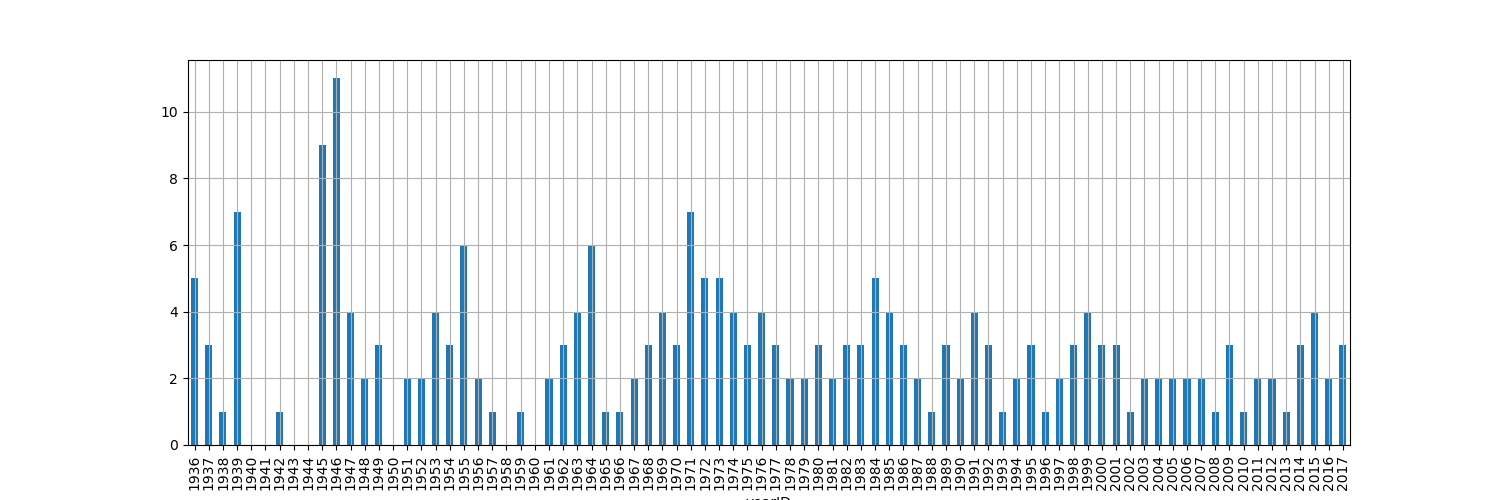

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>yearID</th>
      <th>1936</th>
      <th>1937</th>
      <th>1938</th>
      <th>1939</th>
      <th>1942</th>
      <th>1945</th>
      <th>1946</th>
      <th>1947</th>
      <th>1948</th>
      <th>1949</th>
      <th>1950</th>
      <th>1951</th>
      <th>1952</th>
      <th>1953</th>
      <th>1954</th>
      <th>1955</th>
      <th>1956</th>
      <th>1957</th>
      <th>1958</th>
      <th>1959</th>
      <th>1960</th>
      <th>1961</th>
      <th>1962</th>
      <th>1963</th>
      <th>1964</th>
      <th>1965</th>
      <th>1966</th>
      <th>1967</th>
      <th>1968</th>
      <th>1969</th>
      <th>1970</th>
      <th>1971</th>
      <th>1972</th>
      <th>1973</th>
      <th>1974</th>
      <th>1975</th>
      <th>1976</th>
      <th>1977</th>
      <th>1978</th>
      <th>1979</th>
      <th>1980</th>
      <th>1981</th>
      <th>1982</th>
      <th>1983</th>
      <th>1984</th>
      <th>1985</th>
      <th>1986</th>
      <th>1987</th>
      <th>1988</th>
      <th>1989</th>
      <th>1990</th>
      <th>1991</th>
      <th>1992</th>
      <th>1993</th>
      <th>1994</th>
      <th>1995</th>
      <th>1996</th>
      <th>1997</th>
      <th>1998</th>
      <th>1999</th>
      <th>2000</th>
      <th>2001</th>
      <th>2002</th>
      <th>2003</th>
      <th>2004</th>
      <th>2005</th>
      <th>2006</th>
      <th>2007</th>
      <th>2008</th>
      <th>2009</th>
      <th>2010</th>
      <th>2011</th>
      <th>2012</th>
      <th>2013</th>
      <th>2014</th>
      <th>2015</th>
      <th>2016</th>
      <th>2017</th>
      <th>2018</th>
    </tr>
    <tr>
      <th>inducted</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>N</th>
      <td>105.0</td>
      <td>106.0</td>
      <td>114.0</td>
      <td>99.0</td>
      <td>67.0</td>
      <td>89.0</td>
      <td>97.0</td>
      <td>34.0</td>
      <td>100.0</td>
      <td>117.0</td>
      <td>96</td>
      <td>80.0</td>
      <td>69.0</td>
      <td>77.0</td>
      <td>50.0</td>
      <td>60.0</td>
      <td>102.0</td>
      <td>-</td>
      <td>150</td>
      <td>-</td>
      <td>131</td>
      <td>-</td>
      <td>75.0</td>
      <td>-</td>
      <td>87.0</td>
      <td>-</td>
      <td>47.0</td>
      <td>77.0</td>
      <td>47.0</td>
      <td>44.0</td>
      <td>45.0</td>
      <td>48.0</td>
      <td>43.0</td>
      <td>43.0</td>
      <td>42.0</td>
      <td>36.0</td>
      <td>30.0</td>
      <td>33.0</td>
      <td>36.0</td>
      <td>53.0</td>
      <td>59.0</td>
      <td>38.0</td>
      <td>40.0</td>
      <td>44.0</td>
      <td>26.0</td>
      <td>39.0</td>
      <td>40.0</td>
      <td>26.0</td>
      <td>43.0</td>
      <td>39.0</td>
      <td>42.0</td>
      <td>42.0</td>
      <td>35.0</td>
      <td>32.0</td>
      <td>38.0</td>
      <td>38.0</td>
      <td>35.0</td>
      <td>29.0</td>
      <td>25.0</td>
      <td>25.0</td>
      <td>28.0</td>
      <td>30.0</td>
      <td>27.0</td>
      <td>31.0</td>
      <td>30.0</td>
      <td>25.0</td>
      <td>28.0</td>
      <td>30.0</td>
      <td>24.0</td>
      <td>21.0</td>
      <td>25.0</td>
      <td>31.0</td>
      <td>26.0</td>
      <td>37.0</td>
      <td>33.0</td>
      <td>30.0</td>
      <td>30.0</td>
      <td>31.0</td>
      <td>29.0</td>
    </tr>
    <tr>
      <th>Y</th>
      <td>5.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>7.0</td>
      <td>1.0</td>
      <td>9.0</td>
      <td>11.0</td>
      <td>4.0</td>
      <td>2.0</td>
      <td>3.0</td>
      <td>-</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>4.0</td>
      <td>3.0</td>
      <td>6.0</td>
      <td>2.0</td>
      <td>1</td>
      <td>-</td>
      <td>1</td>
      <td>-</td>
      <td>2</td>
      <td>3.0</td>
      <td>4</td>
      <td>6.0</td>
      <td>1</td>
      <td>1.0</td>
      <td>2.0</td>
      <td>3.0</td>
      <td>4.0</td>
      <td>3.0</td>
      <td>7.0</td>
      <td>5.0</td>
      <td>5.0</td>
      <td>4.0</td>
      <td>3.0</td>
      <td>4.0</td>
      <td>3.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>3.0</td>
      <td>2.0</td>
      <td>3.0</td>
      <td>3.0</td>
      <td>5.0</td>
      <td>4.0</td>
      <td>3.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>3.0</td>
      <td>2.0</td>
      <td>4.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>2.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>2.0</td>
      <td>3.0</td>
      <td>4.0</td>
      <td>3.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>3.0</td>
      <td>4.0</td>
      <td>2.0</td>
      <td>3.0</td>
      <td>6.0</td>
    </tr>
  </tbody>
</table>

Some hitters may have also pitched, so we’ll need to filter out those appearances. 
`join.G_p` represents the numbers of games a player played as a pitcher and we select
players who played mostly as pitchers, or pitched more than 100 games.

    pitchers = join[join.G_p > 100]

Group the `pitchers` based on a `condition`.
    
    condition = [pitchers.inducted, pitchers.yearID]
    
And count them annually.
    
    grouped_pitchers = pitchers.groupby(condition).count()
    
    df = grouped_pitchers.execute().set_index('inducted yearID'.split())
    
    
<!--
    
    fig = df.loc['Y']['count'].pipe(
        lambda df: df.reindex(range(df.index.min(), df.index.max())).fillna(0)
    ).rename('Inducted pitchers').plot.bar(figsize=(15, 5), grid=True)

    
    fig = __import__('io').BytesIO()
    __import__('matplotlib').pyplot.savefig(fig)
    return raw(fig.getvalue())
    
-->

[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view

In [13]:
{{df.unstack(0)['count'].T.fillna('-').to_html()}}

Some hitters may have also pitched, so we’ll need to filter out those appearances. 
`join.G_p` represents the numbers of games a player played as a pitcher and we select
players who played mostly as pitchers, or pitched more than 100 games.

    pitchers = join[join.G_p > 100]

Group the `pitchers` based on a `condition`.
    
    condition = [pitchers.inducted, pitchers.yearID]
    
And count them annually.
    
    grouped_pitchers = pitchers.groupby(condition).count()
    
    df = grouped_pitchers.execute().set_index('inducted yearID'.split())
    
    
<!--
    
    fig = df.loc['Y']['count'].pipe(
        lambda df: df.reindex(range(df.index.min(), df.index.max())).fillna(0)
    ).rename('Inducted pitchers').plot.bar(figsize=(15, 5), grid=True)

    
    fig = __import__('io').BytesIO()
    __import__('matplotlib').pyplot.savefig(fig)
    return raw(fig.getvalue())
    
-->

{{refs}}

In [14]:
## What next?

That's it! In future posts, we’ll explore more backends and visualize more [ibis] objects.
If you’d like to contribute to ibis, please take a look at [OpenTeams] or the [ibis contributing guide][contributing].

{{refs}}

## What next?

That's it! In future posts, we’ll explore more backends and visualize more ibis objects.
If you’d like to contribute to ibis, please take a look at [OpenTeams] or the [ibis contributing guide][contributing].

[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view